# Credit Card Transactions Fraud Detector

## Introduction

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The features are scaled and the names of the features are not shown due to confedentiality reasons

## Goal
1. To get a sense of data and build through Exploratory Data Analysis.
2. Buil a boosted tree predictive model to predict the occurance of fraud in new data.
3. Use SHAP methods to understand the predictions

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_curve, average_precision_score

pd.options.display.max_columns = 100
matplotlib.style.use('ggplot')

### 2. Load data and descriptive analysis

In [2]:
df = pd.read_csv('creditcard.csv.zip', compression = 'zip')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [85]:
# check for nulls
print("Any null values in the data? ", df.isnull().any().any())

Any null values in the data?  False


In [91]:
print("Number of total transactions = {} and number of fraud transactions = {}".format(len(df), df.Class.value_counts()[1]))

Number of total transactions = 284807 and number of fraud transactions = 492


In [86]:
# Percentage of fraud transactions in data
print("Percentage of fraud transactions in data:{:.2%}".format(df.Class.value_counts()[1]/len(df)))

Percentage of fraud transactions in data:0.17%


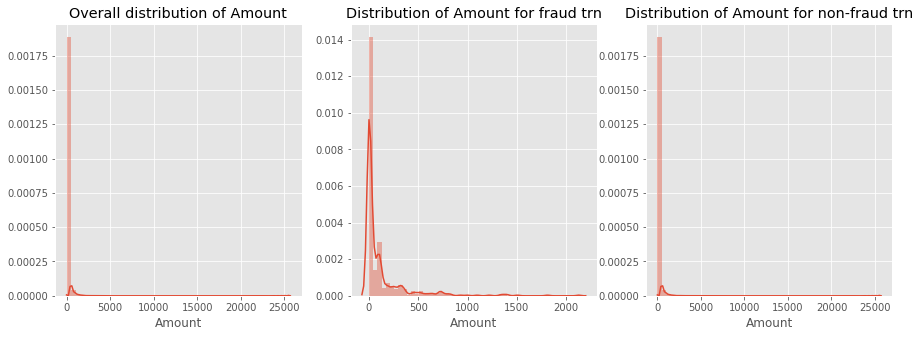

In [138]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

sns.distplot(df.Amount, ax = ax[0],kde = True)
ax[0].set_title('Overall distribution of Amount')

sns.distplot(df[df['Class'] ==1].Amount,ax = ax[1], kde = True)
ax[1].set_title('Distribution of Amount for fraud trn')

sns.distplot(df[df['Class'] ==0].Amount,ax = ax[2], kde = True)
ax[2].set_title('Distribution of Amount for non-fraud trn')

plt.show()

In [169]:
df[df['Amount'] > df.Amount.quantile(q =0.999)].Class.value_counts()

0    284
Name: Class, dtype: int64

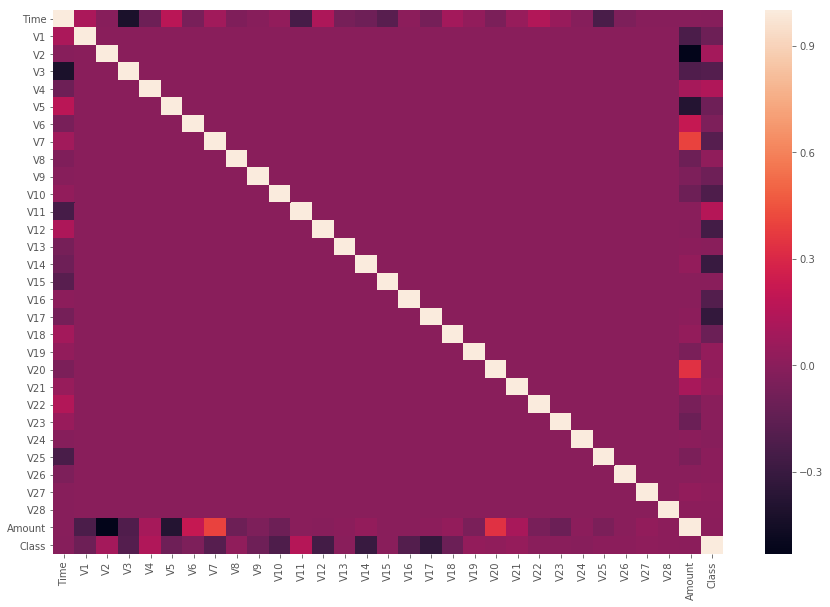

In [153]:
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(df.corr())
# plt.figure(figsize = (15,10))

## Training the model

In [3]:
df_x = df.drop('Class', axis = 1)
df_y = df['Class'].values

X_train, X_test,y_train, y_test = train_test_split(df_x, df_y, test_size = 0.15, random_state = 123) 

train_data = xgb.DMatrix(X_train, label = y_train)
test_data = xgb.DMatrix(X_test, label = y_test)

In [9]:
sum(df.Class == 0), sum(df.Class == 1), np.mean(df.Class == 1)

(284315, 492, 0.001727485630620034)

In [10]:
# Defining parameters
scale_pos_weight = sum(df.Class == 0)/sum(df.Class == 1)

params = {
    'objective': 'binary:logistic',
    'eta': 0.01,
    'max_depth': 6,
    'silent': 1,
    'subsample': 0.9,
    'eval_metric': ['error','auc','aucpr'],
    'colsample_bytee': 0.8,
    'scale_pos_weight' : scale_pos_weight,
    'base_score':np.mean(df.Class == 1)
    }

num_round = 1000
watchlist = [(test_data, 'eval'), (train_data, 'train')]

In [11]:
%%time
model_xgb = xgb.train(params, train_data, num_boost_round = num_round,
                     evals = watchlist, verbose_eval = 100,
                     early_stopping_rounds = 50,
                     maximize = True)

[0]	eval-error:0.001849	eval-auc:0.980643	eval-aucpr:0.497818	train-error:0.001706	train-auc:0.98328	train-aucpr:0.448161
Multiple eval metrics have been passed: 'train-aucpr' will be used for early stopping.

Will train until train-aucpr hasn't improved in 50 rounds.
[100]	eval-error:0.00433	eval-auc:0.988932	eval-aucpr:0.805513	train-error:0.003933	train-auc:0.999462	train-aucpr:0.748455
[200]	eval-error:0.004658	eval-auc:0.98996	eval-aucpr:0.812252	train-error:0.004238	train-auc:0.999797	train-aucpr:0.861192
[300]	eval-error:0.003722	eval-auc:0.989823	eval-aucpr:0.797086	train-error:0.003226	train-auc:0.999872	train-aucpr:0.879588
[400]	eval-error:0.002879	eval-auc:0.990246	eval-aucpr:0.851727	train-error:0.002107	train-auc:0.999932	train-aucpr:0.942897
[500]	eval-error:0.002294	eval-auc:0.990596	eval-aucpr:0.856491	train-error:0.001409	train-auc:0.99995	train-aucpr:0.95404
[600]	eval-error:0.001709	eval-auc:0.990628	eval-aucpr:0.862045	train-error:0.000996	train-auc:0.999982	train-

In [212]:
model_xgb.save_model('cc_xgb.model')

In [12]:
model_xgb.save_model('cc_xgb3.model')

In [13]:
bst = xgb.Booster(model_file='cc_xgb3.model')

In [14]:
sum(df.Class == 1)/len(df)

0.001727485630620034

In [228]:
xgb.cv(params, train_data, num_boost_round = 10,
                    nfold=5,
                     #evals = watchlist, 
                       verbose_eval = 5,
                    metrics = {'error', 'logloss'},
                     early_stopping_rounds = 20,
                   callbacks=[xgb.callback.print_evaluation(show_stdv=True),
                             xgb.callback.early_stop(20)])

[0]	train-error:0.0176724+0.00299659	train-logloss:0.683874+0.000206272	test-error:0.018097+0.00357417	test-logloss:0.683882+0.000212099
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 20 rounds.
[0]	train-error:0.0176724+0.00299659	train-logloss:0.683874+0.000206272	test-error:0.018097+0.00357417	test-logloss:0.683882+0.000212099
[1]	train-error:0.0054412+0.00142833	train-logloss:0.674801+0.000245957	test-error:0.0058036+0.00155475	test-logloss:0.67482+0.000253348
[2]	train-error:0.0092942+0.00333805	train-logloss:0.665941+0.000354666	test-error:0.0095586+0.00293752	test-logloss:0.665972+0.0003619
[3]	train-error:0.0064412+0.00220119	train-logloss:0.657163+0.000358323	test-error:0.006816+0.00225703	test-logloss:0.657203+0.000366344
[4]	train-error:0.0075634+0.00292717	train-logloss:0.648672+0.000367233	test-error:0.0080674+0.00286582	test-logloss:0.648714+0.000383932
[5]	train-error:0.006219+0.00

,train-error-mean,train-error-std,train-logloss-mean,train-logloss-std,test-error-mean,test-error-std,test-logloss-mean,test-logloss-std
0,0.017672,0.002997,0.683874,0.000206,0.018097,0.003574,0.683882,0.000212
1,0.005441,0.001428,0.674801,0.000246,0.005804,0.001555,0.674820,0.000253
2,0.009294,0.003338,0.665941,0.000355,0.009559,0.002938,0.665972,0.000362
3,0.006441,0.002201,0.657163,0.000358,0.006816,0.002257,0.657203,0.000366
4,0.007563,0.002927,0.648672,0.000367,0.008067,0.002866,0.648714,0.000384
5,0.006219,0.002256,0.640170,0.000502,0.006613,0.002008,0.640217,0.000526
6,0.006769,0.003114,0.631896,0.000551,0.007167,0.002872,0.631954,0.000589
7,0.006052,0.002243,0.623769,0.000639,0.006357,0.002031,0.623834,0.000674
8,0.006428,0.002828,0.615797,0.000778,0.006836,0.002586,0.615868,0.000817
9,0.006022,0.002172,0.607950,0.000890,0.006436,0.001964,0.608028,0.000927


In [21]:

pred = np.where(bst.predict(test_data) > 0.83, 1,0)
sum(bst.predict(test_data) > 0.87)

77

In [22]:
sum(y_test == 1)

79

In [23]:
accuracy_score(y_test, pred), f1_score(y_test, pred)

#with threshold 0.99 => (0.9994850428350732, 0.8472222222222223)
#with threshold 0.85 => (0.9995318571227939, 0.8717948717948718)

#with threshold 0.87 => (0.9995552642666542, 0.8774193548387097)

(0.9994382285473526, 0.846153846153846)

In [15]:
p,r,a = precision_recall_curve(y_test,bst.predict(test_data) )

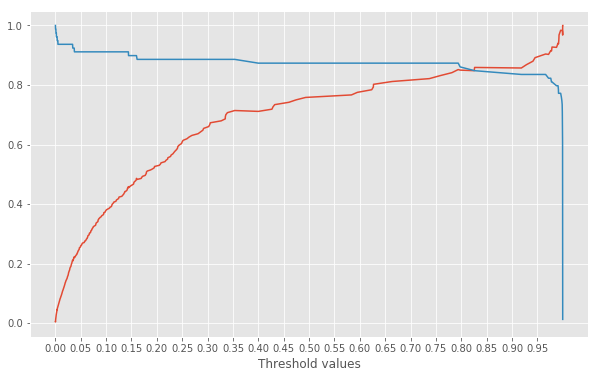

In [16]:
len(p), len(p[:-1])
plt.figure(figsize=(10,6))
plt.plot(a, p[:-1])
plt.plot(a, r[:-1])
plt.xlabel('Threshold values')
plt.xticks(np.arange(0,1,0.05))
plt.show()

In [242]:
average_precision_score(y_test,bst.predict(test_data))

0.8766649691306394

In [239]:
len(y_test)

42722

## Calculating SHAP

In [27]:
import shap

ModuleNotFoundError: No module named 'shap'

In [26]:
shap.initjs()

NameError: name 'shap' is not defined

In [302]:
explainer = shap.TreeExplainer(bst)

C extension was not built during install!


ImportError: numpy.core.multiarray failed to import

In [1]:
hash('abc')

-5726863997587629271